# Working with slide-seq data

In [1]:
import stlearn as st
import warnings
warnings.filterwarnings('ignore')

The data is downloaded from https://www.spatialomics.org/SpatialDB/download.php

Read Slide-seq data

In [2]:
data = st.ReadSlideSeq(count_matrix_file=".SlideSeq/slideseq_30923225/Puck_180413_7.count",
               spatial_file="SlideSeq/slideseq_30923225/Puck_180413_7.idx")

In [3]:
data

AnnData object with n_obs × n_vars = 12282 × 3235 
    obs: 'index', 'imagecol', 'imagerow'
    var: 'ENSEMBL'
    uns: 'spatial'
    obsm: 'spatial'

Plot for QC

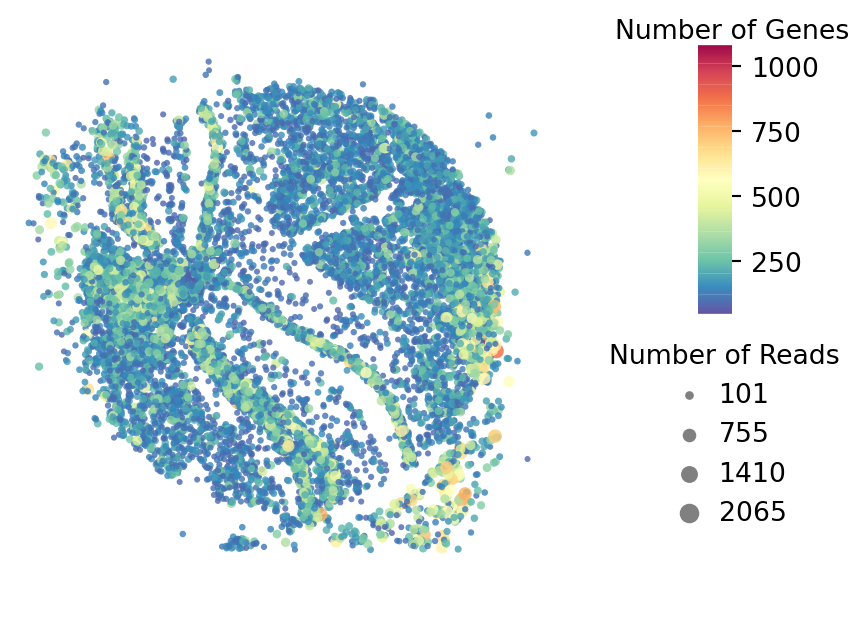

In [4]:
st.pl.QC_plot(data)

Preprocessing data

In [5]:
st.pp.filter_genes(data,min_cells=3)
st.pp.normalize_total(data)
st.pp.log1p(data)
st.pp.scale(data)

Normalization step is finished in adata.X
Log transformation step is finished in adata.X
Scale step is finished in adata.X


Run PCA

In [6]:
st.em.run_pca(data,n_comps=50,random_state=0)

PCA is done! Generated in adata.obsm['X_pca'], adata.uns['pca'] and adata.varm['PCs']


Run and plot louvain clustering

In [7]:
st.pp.neighbors(data,n_neighbors=25,use_rep='X_pca',random_state=0)

Created k-Nearest-Neighbor graph in adata.uns['neighbors'] 


In [8]:
st.tl.clustering.louvain(data,random_state=0)

Applying Louvain clustering ...
Louvain clustering is done! The labels are stored in adata.obs['louvain']


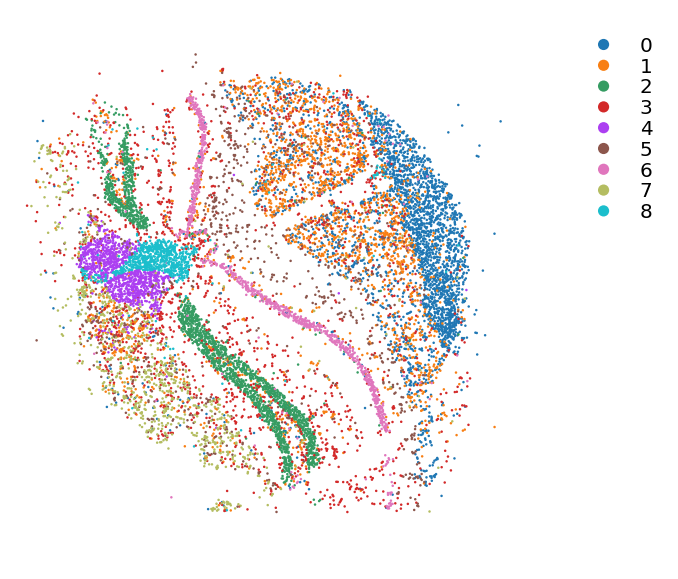

In [9]:
st.pl.cluster_plot(data,use_label="louvain",tissue_alpha=1,spot_size=1,show_legend=True)